In [413]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/Users/jesuslopez/Downloads/train (1).csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [414]:
df.iloc[:, :40].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   MSSubClass    1460 non-null   int64  
 2   MSZoning      1460 non-null   object 
 3   LotFrontage   1201 non-null   float64
 4   LotArea       1460 non-null   int64  
 5   Street        1460 non-null   object 
 6   Alley         91 non-null     object 
 7   LotShape      1460 non-null   object 
 8   LandContour   1460 non-null   object 
 9   Utilities     1460 non-null   object 
 10  LotConfig     1460 non-null   object 
 11  LandSlope     1460 non-null   object 
 12  Neighborhood  1460 non-null   object 
 13  Condition1    1460 non-null   object 
 14  Condition2    1460 non-null   object 
 15  BldgType      1460 non-null   object 
 16  HouseStyle    1460 non-null   object 
 17  OverallQual   1460 non-null   int64  
 18  OverallCond   1460 non-null 

In [415]:
df.iloc[:, 40:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 41 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HeatingQC      1460 non-null   object 
 1   CentralAir     1460 non-null   object 
 2   Electrical     1459 non-null   object 
 3   1stFlrSF       1460 non-null   int64  
 4   2ndFlrSF       1460 non-null   int64  
 5   LowQualFinSF   1460 non-null   int64  
 6   GrLivArea      1460 non-null   int64  
 7   BsmtFullBath   1460 non-null   int64  
 8   BsmtHalfBath   1460 non-null   int64  
 9   FullBath       1460 non-null   int64  
 10  HalfBath       1460 non-null   int64  
 11  BedroomAbvGr   1460 non-null   int64  
 12  KitchenAbvGr   1460 non-null   int64  
 13  KitchenQual    1460 non-null   object 
 14  TotRmsAbvGrd   1460 non-null   int64  
 15  Functional     1460 non-null   object 
 16  Fireplaces     1460 non-null   int64  
 17  FireplaceQu    770 non-null    object 
 18  GarageTy

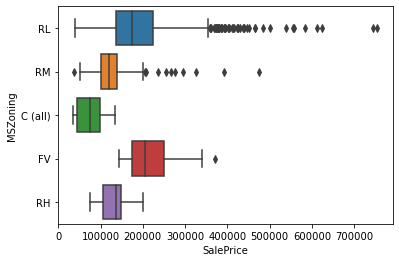

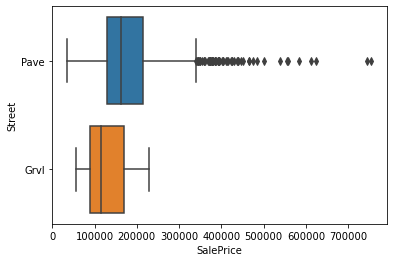

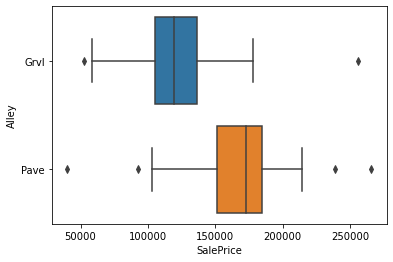

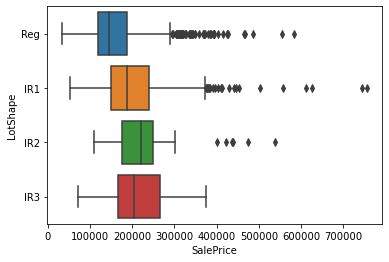

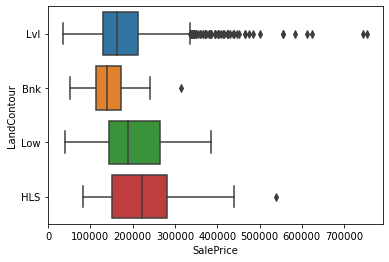

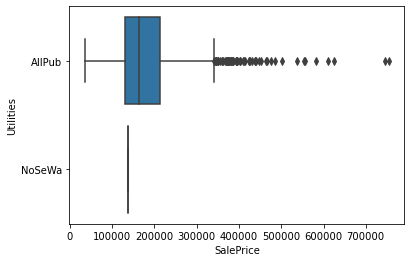

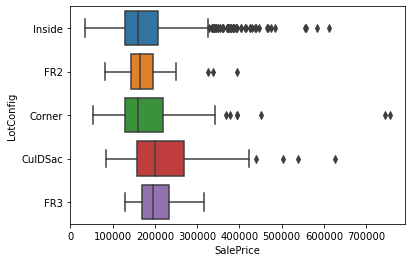

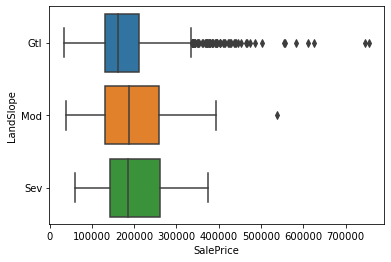

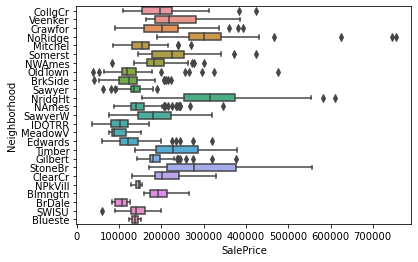

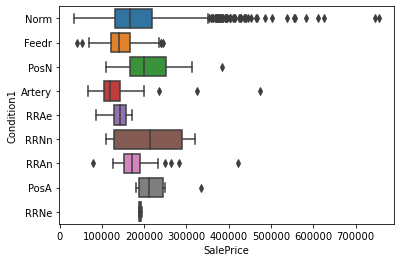

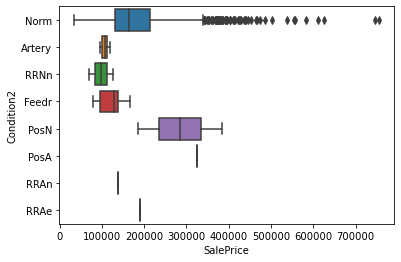

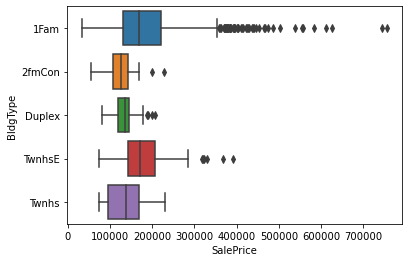

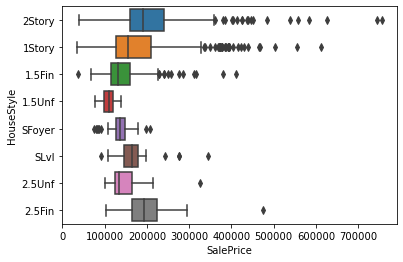

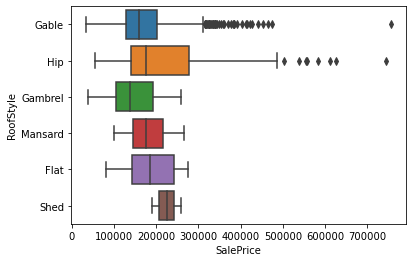

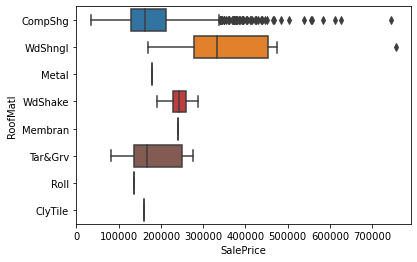

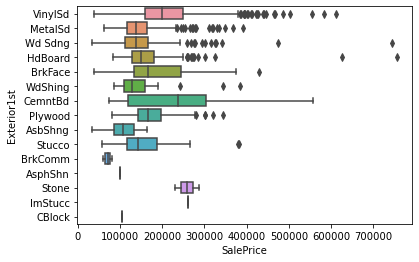

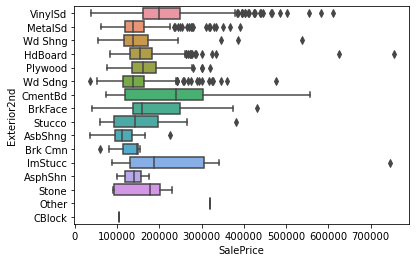

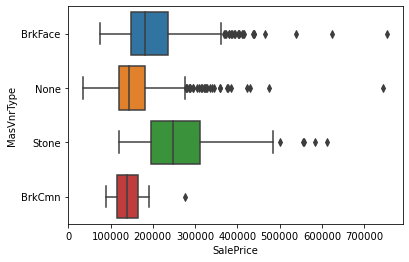

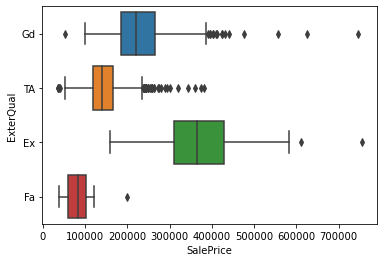

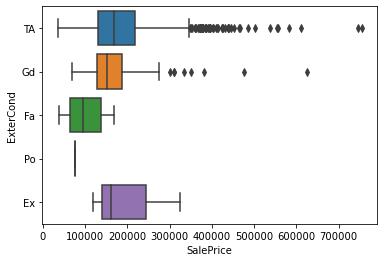

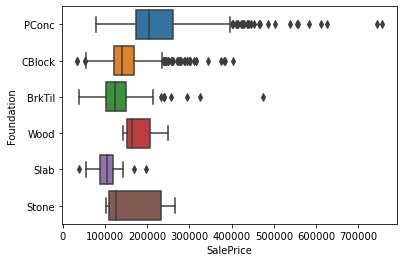

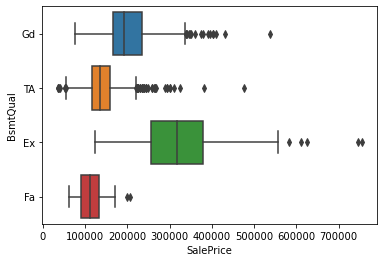

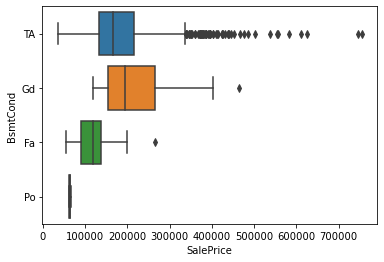

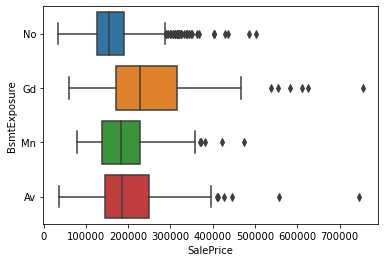

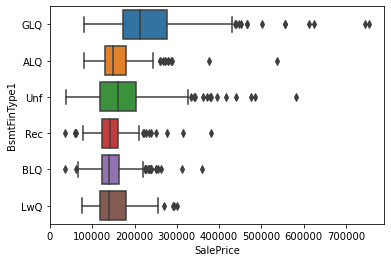

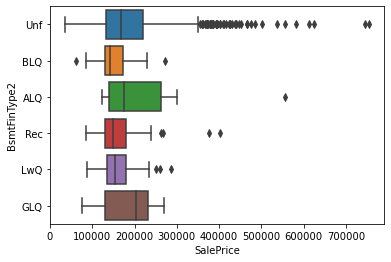

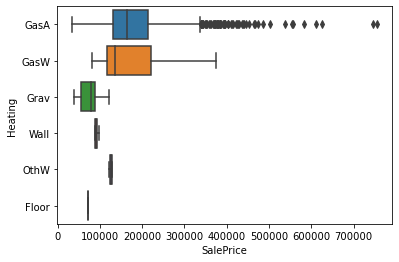

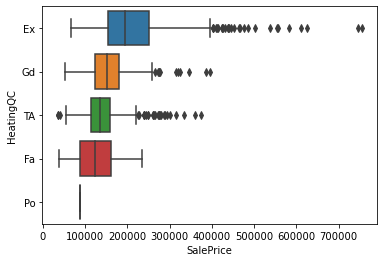

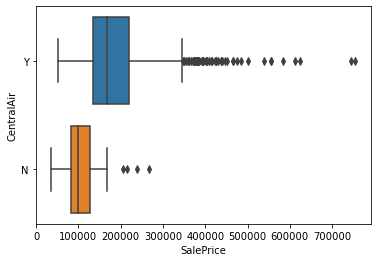

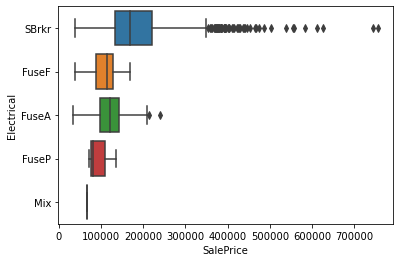

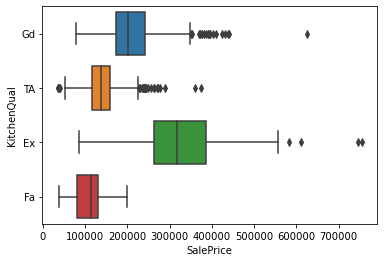

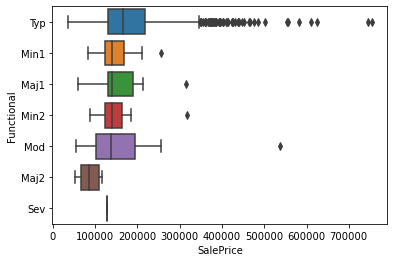

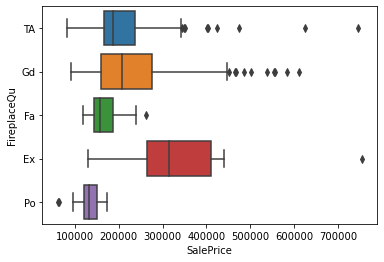

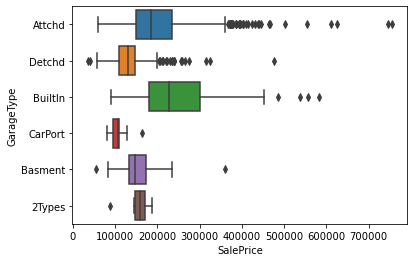

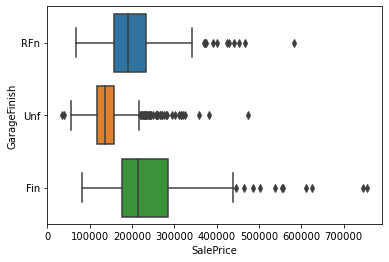

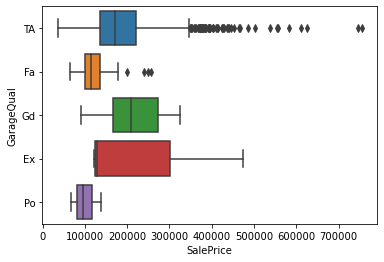

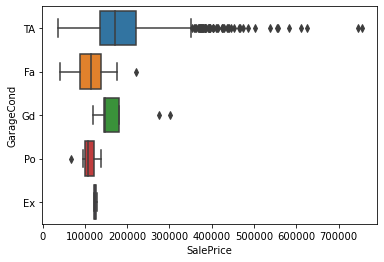

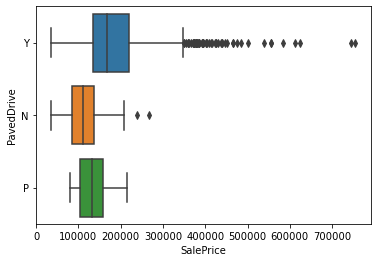

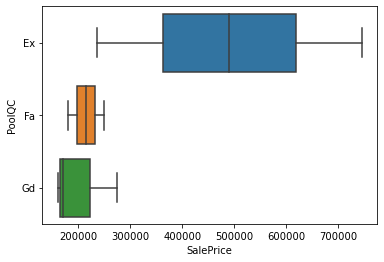

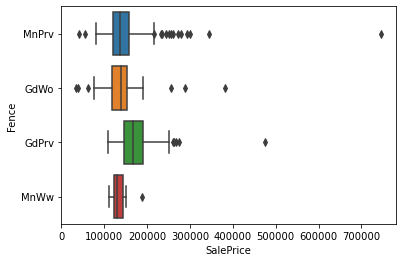

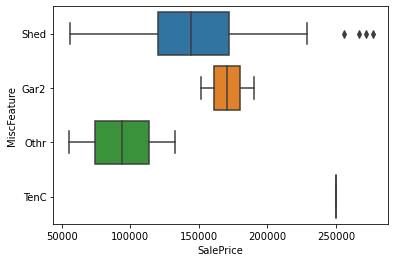

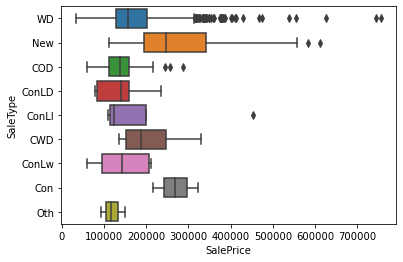

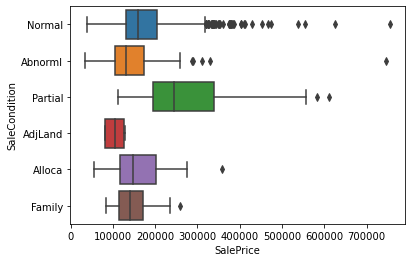

In [416]:
df_o = df.select_dtypes(include=['object'])
for i in df_o.columns:
    sns.boxplot(x=df['SalePrice'], y=df_o[i]) # revisamos los outliers de cada categoría
    plt.show()


After reviewing our categorical variables, we droped those with their SalePrice vary is lower. Next code we are going to name those.

In [417]:
df_new = df.drop(columns=['Street', 'Alley', 'Utilities', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageArea', 'LotShape', 'LotConfig', 'LandSlope', 'BldgType', 'RoofStyle', 'ExterCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Functional', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'])
df_new.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LandContour,Neighborhood,Condition1,Condition2,HouseStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Lvl,CollgCr,Norm,Norm,2Story,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Lvl,Veenker,Feedr,Norm,1Story,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Lvl,CollgCr,Norm,Norm,2Story,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Lvl,Crawfor,Norm,Norm,2Story,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Lvl,NoRidge,Norm,Norm,2Story,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [418]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 50 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LandContour    1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   Condition1     1460 non-null   object 
 8   Condition2     1460 non-null   object 
 9   HouseStyle     1460 non-null   object 
 10  OverallQual    1460 non-null   int64  
 11  OverallCond    1460 non-null   int64  
 12  YearBuilt      1460 non-null   int64  
 13  YearRemodAdd   1460 non-null   int64  
 14  RoofMatl       1460 non-null   object 
 15  Exterior1st    1460 non-null   object 
 16  Exterior2nd    1460 non-null   object 
 17  MasVnrArea     1452 non-null   float64
 18  ExterQua

As we see, we have columns with NaN values. Let's fill up with meadian function.

In [419]:
df_new = df_new.fillna(df_new.select_dtypes(include=['float64']).median())

As we can see, few rows in categorical variable have NaN. Let's eliminate those rows because their percentage is low in our dataset.

In [420]:
df_new = df_new.dropna()

Let's call info again to review our results

In [421]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1378 entries, 0 to 1459
Data columns (total 50 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1378 non-null   int64  
 1   MSSubClass     1378 non-null   int64  
 2   MSZoning       1378 non-null   object 
 3   LotFrontage    1378 non-null   float64
 4   LotArea        1378 non-null   int64  
 5   LandContour    1378 non-null   object 
 6   Neighborhood   1378 non-null   object 
 7   Condition1     1378 non-null   object 
 8   Condition2     1378 non-null   object 
 9   HouseStyle     1378 non-null   object 
 10  OverallQual    1378 non-null   int64  
 11  OverallCond    1378 non-null   int64  
 12  YearBuilt      1378 non-null   int64  
 13  YearRemodAdd   1378 non-null   int64  
 14  RoofMatl       1378 non-null   object 
 15  Exterior1st    1378 non-null   object 
 16  Exterior2nd    1378 non-null   object 
 17  MasVnrArea     1378 non-null   float64
 18  ExterQua

Let's evaluate correlation between our numerical values

In [422]:
corr_matrix = df_new.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.787319
GrLivArea        0.708160
GarageCars       0.637151
TotalBsmtSF      0.603883
FullBath         0.556806
TotRmsAbvGrd     0.538381
YearBuilt        0.508013
YearRemodAdd     0.505822
GarageYrBlt      0.486797
MasVnrArea       0.463109
Fireplaces       0.448883
OpenPorchSF      0.332986
LotFrontage      0.329390
WoodDeckSF       0.312641
HalfBath         0.271067
LotArea          0.252911
BedroomAbvGr     0.164688
ScreenPorch      0.099411
PoolArea         0.091509
MoSold           0.043672
3SsnPorch        0.039208
MiscVal         -0.017948
YrSold          -0.026703
Id              -0.027406
MSSubClass      -0.077622
OverallCond     -0.095378
EnclosedPorch   -0.120229
KitchenAbvGr    -0.135611
Name: SalePrice, dtype: float64

We are interest in just those who has a correlation grater than 0.5 and less than -0.1. Let's drop the rest.

In [423]:
df_new = df_new.drop(['MasVnrArea', 'Fireplaces', 'GarageYrBlt', 'LotFrontage', 'WoodDeckSF', 'OpenPorchSF', 'HalfBath', 'LotArea', 'BedroomAbvGr', 'ScreenPorch', 'PoolArea', 'MoSold', '3SsnPorch', 'MiscVal', 'Id', 'YrSold', 'OverallCond', 'MSSubClass'], axis=1)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1378 entries, 0 to 1459
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1378 non-null   object
 1   LandContour    1378 non-null   object
 2   Neighborhood   1378 non-null   object
 3   Condition1     1378 non-null   object
 4   Condition2     1378 non-null   object
 5   HouseStyle     1378 non-null   object
 6   OverallQual    1378 non-null   int64 
 7   YearBuilt      1378 non-null   int64 
 8   YearRemodAdd   1378 non-null   int64 
 9   RoofMatl       1378 non-null   object
 10  Exterior1st    1378 non-null   object
 11  Exterior2nd    1378 non-null   object
 12  ExterQual      1378 non-null   object
 13  Foundation     1378 non-null   object
 14  TotalBsmtSF    1378 non-null   int64 
 15  Heating        1378 non-null   object
 16  HeatingQC      1378 non-null   object
 17  CentralAir     1378 non-null   object
 18  Electrical     1378 non-null

Now how is our dataset shape:

In [433]:
df_new.shape

(1378, 32)

Ok. We have our dataset cleaned, let's see our stats

In [427]:
df_new.describe()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,KitchenAbvGr,TotRmsAbvGrd,GarageCars,EnclosedPorch,SalePrice
count,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000
mean,6.187954,1972.934688,1985.419448,1074.947025,1534.791727,1.579826,1.038462,6.552250,1.870827,21.054427,185492.558781
std,1.345889,29.377049,20.444010,436.133293,519.315134,0.548133,0.196116,1.590353,0.630274,60.554428,79051.093697
min,2.000000,1880.000000,1950.000000,0.000000,438.000000,0.000000,1.000000,3.000000,1.000000,0.000000,35311.000000
25%,5.000000,1955.000000,1968.000000,810.250000,1154.000000,1.000000,1.000000,5.000000,1.000000,0.000000,134000.000000
50%,6.000000,1976.000000,1994.000000,1008.000000,1479.000000,2.000000,1.000000,6.000000,2.000000,0.000000,167700.000000
75%,7.000000,2001.000000,2004.000000,1314.000000,1790.000000,2.000000,1.000000,7.000000,2.000000,0.000000,217875.000000
max,10.000000,2010.000000,2010.000000,6110.000000,5642.000000,3.000000,3.000000,12.000000,4.000000,552.000000,755000.000000


In [434]:
num = ['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'EnclosedPorch', 'SalePrice'] #Num variables

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


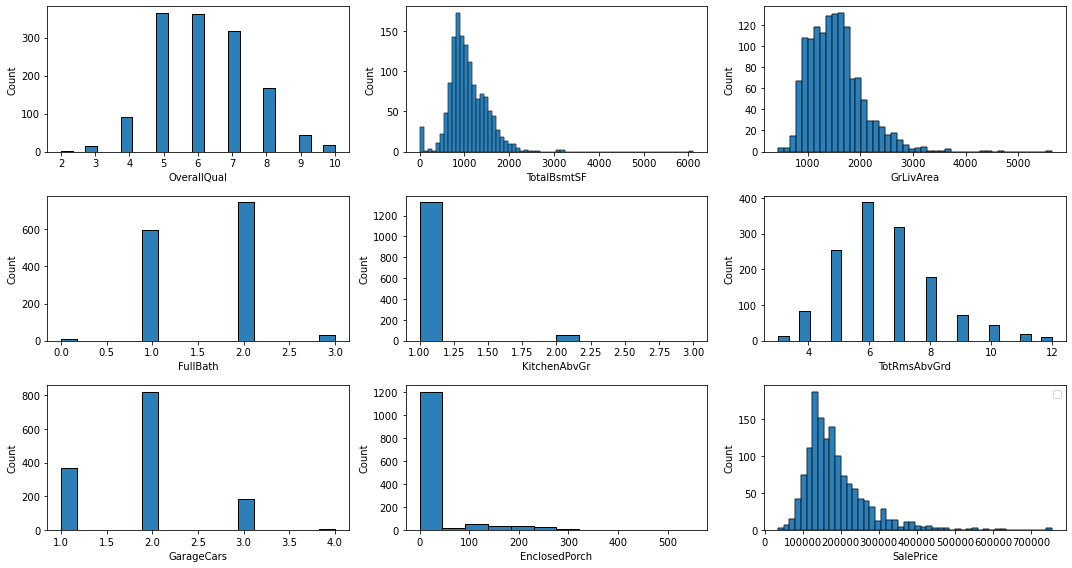

In [429]:
columns = 3
fig, axes = plt.subplots(len(num) //columns, columns, figsize=(15,8))

for current_idx, variable in enumerate(num):
   
    i = current_idx // columns # Filas
    j = current_idx % columns  # Columnas

    sns.histplot(df_new[variable], ax=axes[i][j])
    sns.histplot(df_new[variable], ax=axes[i][j])

plt.tight_layout()
plt.legend()
plt.show()

In [435]:
df_obj = df_new.select_dtypes('object')
colum_header = list(df_obj.columns.values) #Categorical variables

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


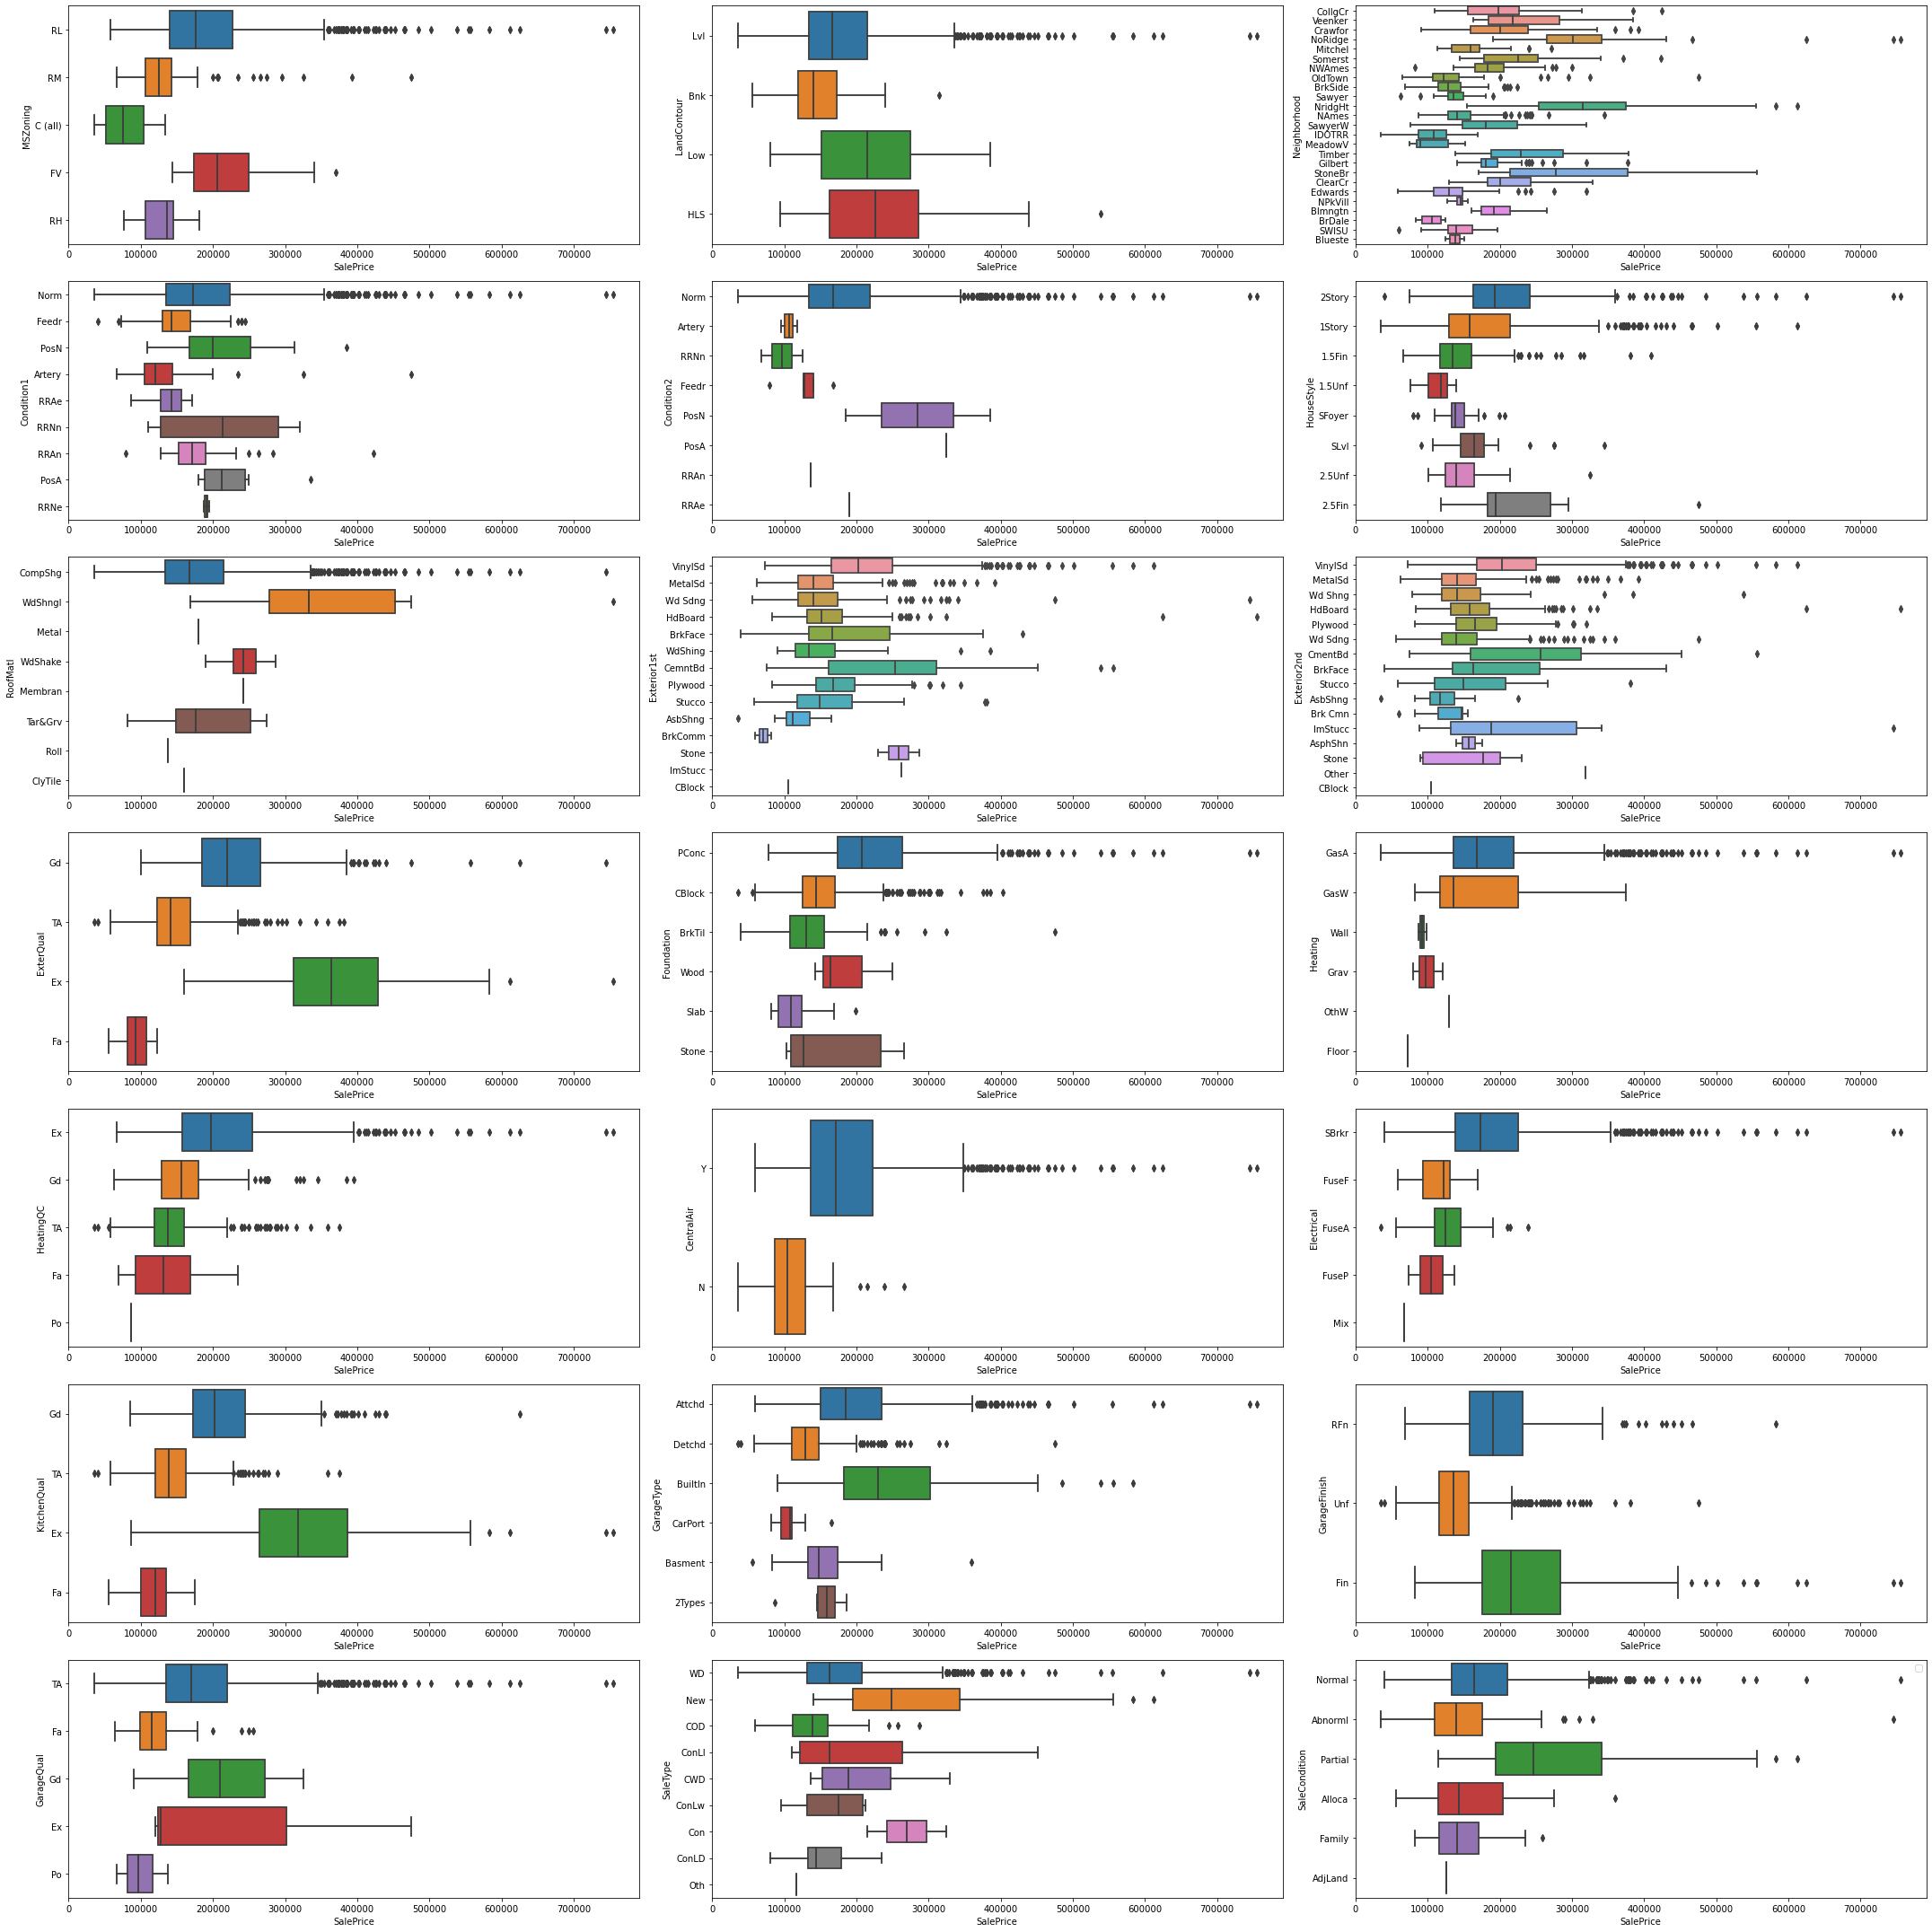

In [431]:
columns = 3

fig, axes = plt.subplots(len(colum_header) //columns, columns, figsize=(30,30))

for current_idx, variable in enumerate(colum_header):
   
    i = current_idx // columns # Filas
    j = current_idx % columns  # Columnas

    sns.boxplot(x=df_new['SalePrice'], y=df_obj[variable], ax=axes[i][j])
    sns.boxplot(x=df_new['SalePrice'], y=df_obj[variable], ax=axes[i][j])

plt.tight_layout()
plt.legend()
plt.show()